# Principio de EDA

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Cargar los datos
df = pd.read_csv('../Data/costo_operacional_vehiculos_clean.csv')

In [14]:
# Función para categorizar los vehículos
def categorize_vehicle(row):
    if row['Fuel_Type'] in ['Diesel', 'Petrol', 'Petrol/LPG']:
        return 'Convencional'
    elif row['Fuel_Type'] == 'Electricity':
        return 'Eléctrico'
    else:
        return 'Híbrido'

# Aplicar la función al dataframe
df['Vehicle_Type'] = df.apply(categorize_vehicle, axis=1)

# Verificar la distribución
print(df['Vehicle_Type'].value_counts())


Vehicle_Type
Convencional    3374
Híbrido         1012
Eléctrico        239
Name: count, dtype: int64


             Fuel_Cost                                                    \
                 count         mean         std         min          25%   
Vehicle_Type                                                               
Convencional    3374.0  1543.250501  454.271288  880.477090  1250.741298   
Eléctrico        239.0     0.000000    0.000000    0.000000     0.000000   
Híbrido         1012.0  1145.858814  444.971244  107.160699   966.845415   

                                                    Electric_Cost              \
                      50%          75%          max         count        mean   
Vehicle_Type                                                                    
Convencional  1418.679707  1691.379696  3589.083724        3374.0    0.000000   
Eléctrico        0.000000     0.000000     0.000000         239.0  635.268274   
Híbrido       1138.782358  1375.495545  2879.743870        1012.0   94.961221   

              ...   Total_Cost              Noise_Level 

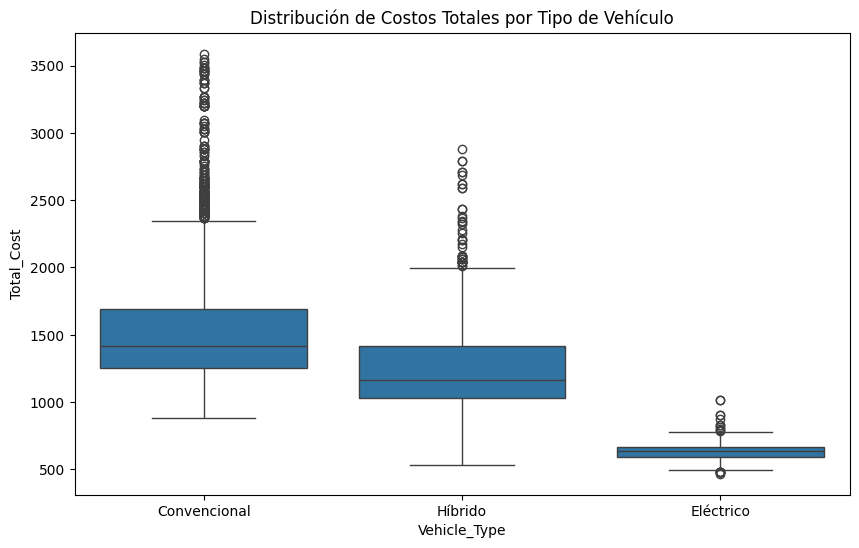

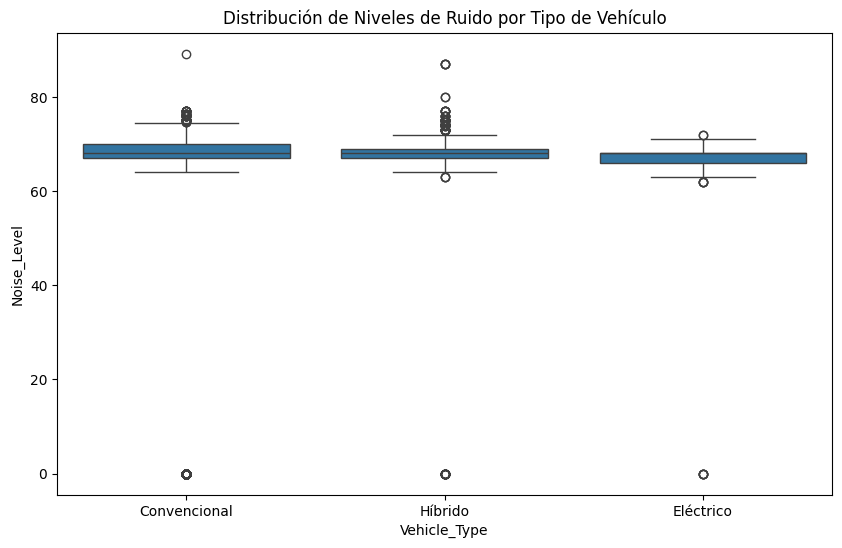

In [15]:
# Resumen estadístico
summary = df.groupby('Vehicle_Type')[['Fuel_Cost', 'Electric_Cost', 'Total_Cost', 'Noise_Level']].describe()
print(summary)

# Boxplot para comparar costos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Total_Cost', data=df)
plt.title('Distribución de Costos Totales por Tipo de Vehículo')
plt.show()

# Boxplot para comparar niveles de ruido
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Noise_Level', data=df)
plt.title('Distribución de Niveles de Ruido por Tipo de Vehículo')
plt.show()


In [16]:
# Sumar costos por tipo de vehículo
total_cost_conventional = df[df['Vehicle_Type'] == 'Convencional']['Total_Cost'].sum()
total_cost_electric_hybrid = df[df['Vehicle_Type'].isin(['Eléctrico', 'Híbrido'])]['Total_Cost'].sum()

# Calcular el KPI
kpi = (total_cost_electric_hybrid / total_cost_conventional) * 100
print(f"KPI: {kpi:.2f}% de reducción de costos operativos al usar vehículos eléctricos o híbridos.")


KPI: 27.03% de reducción de costos operativos al usar vehículos eléctricos o híbridos.


In [17]:
# Calcular promedio y desviación estándar de los niveles de ruido
noise_summary = df.groupby('Vehicle_Type')['Noise_Level'].agg(['mean', 'std'])
print(noise_summary)

# Gráfico de barras para comparar niveles de ruido
plt.figure(figsize=(10, 6))
# Extraer los valores de la desviación estándar en una lista
std_values = noise_summary['std'].values


                   mean        std
Vehicle_Type                      
Convencional  64.627267  16.717637
Eléctrico     65.841004   9.883787
Híbrido       66.690711  10.701175


<Figure size 1000x600 with 0 Axes>

                   mean        std
Vehicle_Type                      
Convencional  64.627267  16.717637
Eléctrico     65.841004   9.883787
Híbrido       66.690711  10.701175


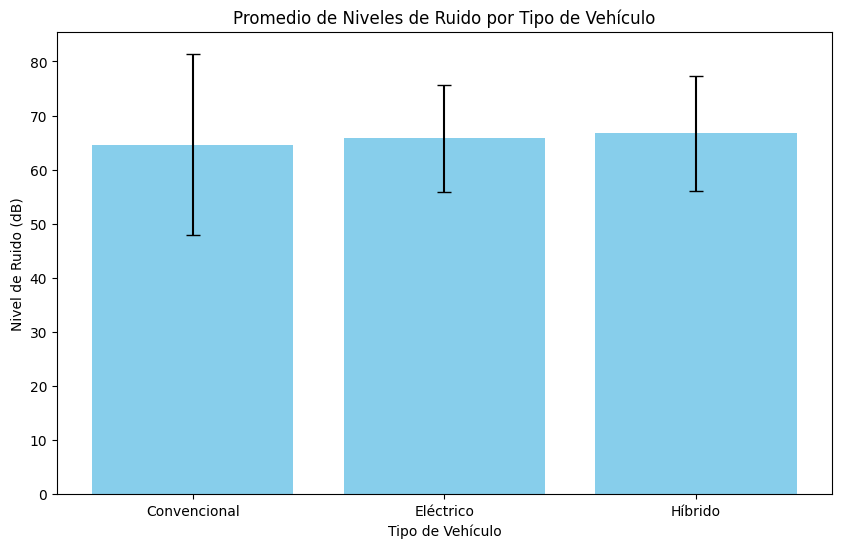

In [18]:
import matplotlib.pyplot as plt

# Calcular promedio y desviación estándar de los niveles de ruido
noise_summary = df.groupby('Vehicle_Type')['Noise_Level'].agg(['mean', 'std'])
print(noise_summary)

# Gráfico de barras para comparar niveles de ruido
plt.figure(figsize=(10, 6))
plt.bar(noise_summary.index, noise_summary['mean'], yerr=std_values, capsize=5, color='skyblue')

# Agregar títulos y etiquetas
plt.title('Promedio de Niveles de Ruido por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Nivel de Ruido (dB)')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()
